In [1]:
import numpy as np
from scipy.sparse import csr_matrix
import paralleltomo as pt
from PIL import Image
import matplotlib.pyplot as plt
import math
import random
from scipy.ndimage import zoom

/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


# Determine optimal parameters
From previous experiments, we assume a range for p of 175 to 250, at least 50 angles and a maximum resolution of N = 75.
The attenuation coefficients have previously been determined as shown below. The aim of this section is to visualise the change in condition number for changes in p and number of angles (len(theta)). Additionally, we want to showcase the accuracy of the recreated images using MSE evaluation.

In [2]:
# Mass attenuation coefficients fpo
mu_wood = 0.32190696
mu_steel = 7.938406
mu_lead = 30.32


In [3]:
# create image function 
def new_image(size,attenuation_wood=0.32190696,attenuation_steel=7.938406,attenuation_lead=30.32):
    image = np.zeros((size,size))
    resize = max(int(size/100),1)
    for i in range(0,size-resize, resize):
        for j in range(0, size-resize, resize):
            if random.random() < 0.00015:
                image[i:i+resize,j:j+resize] = attenuation_lead
            elif random.random() < 0.00015:
                image[i:i+resize,j:j+resize] = attenuation_steel
            else:
                image[i][j] = attenuation_wood
    return image

In [4]:
def calculatingB(A, resized_im):
    x = np.ravel(resized_im)
    b = np.matmul(A,x)
    return b

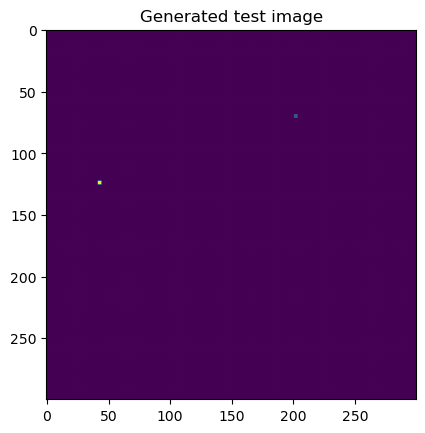

In [9]:
# create initial test image
size = 300
im = new_image(size)
plt.imshow(im)
plt.title("Generated test image")
plt.show()

We are assuming N = 75, since this has been the computational threshold.

We will first create an until now assumed optimal set up, then investigate threshold of under- and overdetermination.

In [17]:
N = 75
nr_angles = 50
theta = np.matrix(np.linspace(0,179,nr_angles))
p = 175

[A,theta,p,d] = pt.paralleltomo(N,theta,p)

/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


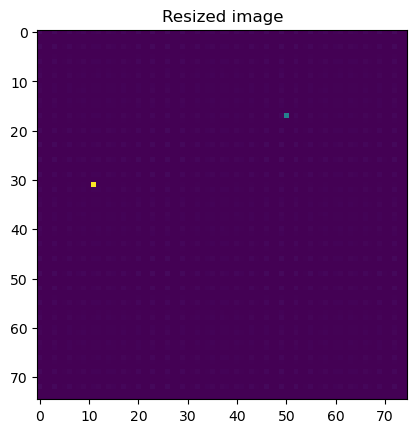

In [18]:
# resize image
resized_im = zoom(im, (N/size, N/size), order=1) # Using Bilinear Interpolation
plt.imshow(resized_im)  
plt.title("Resized image")
plt.show()

for now we add Gaussian noise

In [19]:
def addNoise(b):
    mean = np.mean(b)
    std = np.std(b)
    noise = np.random.normal(mean, std, b.shape)
    noisy_b = b + noise
    return noisy_b

In [20]:
# create function to display original image next to recreated image

b = calculatingB(A, resized_im)
x_no_Noise = np.linalg.lstsq(A, b)[0]
resized_no_noise_im = np.resize(x_no_Noise, (N,N))

noisy_b = addNoise(b)
x_noisy = np.linalg.lstsq(A, noisy_b)[0]
resized_noise_im = np.resize(x_noisy, (N,N))

fig, axs = plt.subplots(1, 2, figsize=(17, 17))
axs[0].imshow(resized_no_noise_im)
axs[0].set_title("Recreated image without noise")
axs[1].imshow(resized_noise_im)
axs[1].set_title("Recreated image with gaussian noise")

plt.show()





/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_3932/2705285869.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_no_Noise = np.linalg.lstsq(A, b)[0]
/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_3932/2705285869.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_noisy = np.linalg.lstsq(A, noisy_b)[0]


Side note: with these parameters, the image is not accurate enough

In [36]:
def recreateImage(A,resized_im):
    if(math.sqrt(A.shape[1]) != resized_im.shape[1]):
        return
    N = int(math.sqrt(A.shape[1]))
    b = calculatingB(A, resized_im)
    x_no_Noise = np.linalg.lstsq(A, b)[0]
    resized_no_noise_im = np.resize(x_no_Noise, (N,N))

    noisy_b = addNoise(b)
    x_noisy = np.linalg.lstsq(A, noisy_b)[0]
    resized_noise_im = np.resize(x_noisy, (N,N))

    fig, axs = plt.subplots(1, 2, figsize=(17, 17))
    axs[0].imshow(resized_no_noise_im)
    axs[0].set_title("Recreated image without noise")
    axs[1].imshow(resized_noise_im)
    axs[1].set_title("Recreated image with gaussian noise")

    plt.show()

    return x_no_Noise,x_noisy



We will increase the number of angles until an acceptable result is produced. Then, we will create A matrices for p values between 250 and the minimum requirement for that angle value.

/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_79531/2370831630.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_no_Noise = np.linalg.lstsq(A, b)[0]
/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_79531/2370831630.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_noisy = np.linalg.lstsq(A, noisy_b)[0]


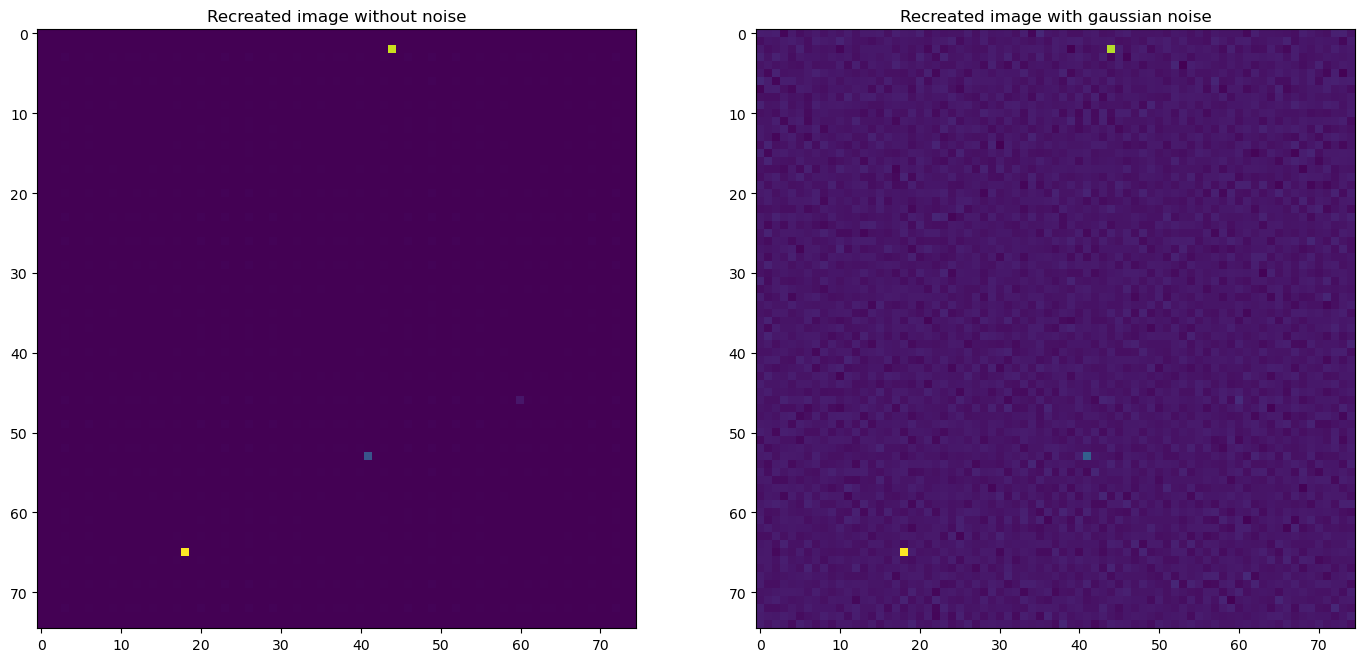

(array([-2.40218598e-14,  6.59472477e-14, -1.11022302e-14, ...,
         1.27816594e-15,  5.09314813e-15, -1.94982919e-15]),
 array([ 0.817261  ,  0.59588544,  0.87510764, ...,  0.13336665,
         0.22418201, -0.55438175]))

In [37]:
nr_angles = 90
theta = np.matrix(np.linspace(0,179,nr_angles))

[A,theta,p,d] = pt.paralleltomo(N,theta,p)
x_no_Noise,x_noisy = recreateImage(A,resized_im)

These images look appropriate, we will for now keep these parameters:
1) p = 175
2) nr_angles = 90
3) N = 75

In [39]:
np.linalg.cond(A)

37.10641586030247

In [84]:
(N**2)/nr_angles

112.5

We will investigate values of p between 113 and 250. For that we will keep the number of angles constant and compute both condition number and MSE using Gaussian noise.

In [89]:
ps = []
for t in range(math.ceil((N**2)/nr_angles),270,20):
    ps.append(t)

A_change_p = []
for pts in ps:
    [A,theta,p,d] = pt.paralleltomo(N,theta,pts)
    A_change_p.append(A)



/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


In [90]:
cAp = []
for a in A_change_p:
    cAp.append(np.linalg.cond(a))
cAp

[5.339318723098781e+47,
 7367787427727041.0,
 2496.179295809592,
 582.916135316276,
 643.8386693882771,
 576.7249094637435,
 625.1447436202902,
 354.7507845381951]

In [91]:
log10_A = []
for a in cAp:
    log10_A.append(np.log10(a))
log10_A

[47.72748584622813,
 15.867337087289647,
 3.39727577667711,
 2.7656060769043425,
 2.8087770571548303,
 2.760968709533015,
 2.7959805838683667,
 2.549923364581188]

In [94]:
ps

[113, 133, 153, 173, 193, 213, 233, 253]

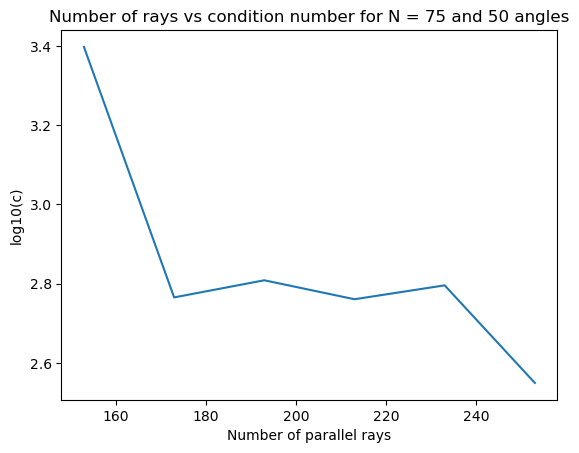

In [95]:
plt.plot(ps[2:],log10_A[2:])
plt.xlabel("Number of parallel rays")
plt.ylabel("log10(c)")
plt.title(f"Number of rays vs condition number for N = {N} and {nr_angles} angles")
plt.show()

We observe a local minimum around 175, which we will pick as the optimal p value.

We now investigate the change in condition number for a change in number of angles, ranging from a maximum of 180 to the minimum tolerated by the optimal value of p = 175.

In [97]:
p_opt = 175
math.ceil((N**2)/p_opt)

33

In [99]:
nr_angles_var = np.arange(math.ceil((N**2)/p_opt),180,30).tolist()
nr_angles_var

[33, 63, 93, 123, 153]

In [112]:
A_change_angles = []
for angle in nr_angles_var:
    theta = np.matrix(np.linspace(0,179,angle))
    [A,theta,p,d] = pt.paralleltomo(N,theta,p_opt)
    A_change_angles.append(A)

cAa = []
for a in A_change_angles:
    cAa.append(np.linalg.cond(a))
cAa

/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


In [111]:
np.max(A_change_angles[0])
np.max(A_change_angles[1])

1.410200901397233